### Import Libraries

In [5]:
import subprocess
import re
import statistics
import matplotlib.pyplot as plt
import pandas as pd

Ping the different mail servers to test the response time

In [ ]:
# List of mail servers to test
mail_servers = {
    "Gmail": "mail.google.com",
    "Outlook": "outlook.office.com",
    "ProtonMail": "mail.proton.me"
}

def ping_server(server):
    """Ping a mail server and return average latency, standard deviation, and packet size."""
    try:
        # Run the Windows ping command (-n 100 sends 100 packets)
        result = subprocess.run(
            ["ping", "-n", "100", server],
            capture_output=True, text=True, check=True
        )
        output = result.stdout

        # Extract all individual ping times: "temps=XXms"
        times = [int(match.group(1)) for match in re.finditer(r"temps[=<]? ?(\d+) ?ms", output)]
        
        # Extract packet size: "octets=32"
        packet_size = None
        match_size = re.search(r"octets=(\d+)", output)
        if match_size:
            packet_size = match_size.group(1)
        
        if times:
            avg_latency = statistics.mean(times)
            std_latency = statistics.stdev(times) if len(times) > 1 else 0  # Avoid error for 1 value
            return avg_latency, std_latency, packet_size
        else:
            return None, None, packet_size
    except subprocess.CalledProcessError:
        return None, None, None

# Run the test
for name, server in mail_servers.items():
    avg, std, packet_size = ping_server(server)
    if avg is not None:
        print(f"{name} ({server}): Moyenne = {avg} ms, Écart-type = {std:.2f} ms, Taille du paquet = {packet_size} octets")
    else:
        print(f"Impossible de ping {name} ({server})")


Gmail (mail.google.com): Moyenne = 15.2 ms, Écart-type = 2.40 ms, Taille du paquet = 32 octets
Outlook (outlook.office.com): Moyenne = 15.79 ms, Écart-type = 1.98 ms, Taille du paquet = 32 octets
ProtonMail (mail.proton.me): Moyenne = 25.24 ms, Écart-type = 13.53 ms, Taille du paquet = 32 octets


Also test localhost for to account for the self-hosted solution response time

In [33]:
avg, std, packet_size = ping_server('127.0.0.1')
if avg is not None:
    print(f"MySolution (127.0.0.1): Moyenne = {avg} ms, Écart-type = {std:.2f} ms, Taille du paquet {packet_size} octets")

MySolution (127.0.0.1): Moyenne = 1 ms, Écart-type = 0.00 ms, Taille du paquet 32 octets


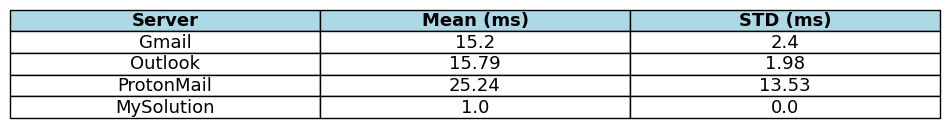

In [6]:
# Create a dataframe with the results
df_results = pd.DataFrame({
    'Server': ['Gmail', 'Outlook', 'ProtonMail', 'MySolution'],
    'Mean (ms)': [15.2, 15.79, 25.24, 1],
    'STD (ms)': [2.40, 1.98, 13.53, 0]

})

# Create a figure and a single subplot with adjusted size
fig, ax = plt.subplots(figsize=(12, 1))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table with adjusted cell colors
table = ax.table(cellText=df_results.values, colLabels=df_results.columns, cellLoc='center', loc='center', 
                 colColours=['lightblue']*df_results.shape[1],)

# Make the column headers and index bold
for (row, col), cell in table.get_celld().items():
    if row == 0 :
        cell.set_text_props(weight='bold')
table.auto_set_font_size(False)
table.set_fontsize(13)
table.scale(1, 1.3)

# Display the plot
plt.show()
